In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Part 2: Matplotlib objects


Python is an object-oriented language, so all of the components of your plots are python objects. A better understanding of these objects will allow you to have much greater control of your visualizations.

![Anatomy of a figure](./images/anatomyOfFigure.png)

## Figures, Axes, and Subplots

In [6]:
f0 = plt.figure()
type(f0)

matplotlib.figure.Figure

<Figure size 432x288 with 0 Axes>

You can set the figure size in inches: very useful for making plots that match journal specifications!

In [7]:
f1 = plt.figure(figsize=(2, 2))

<Figure size 144x144 with 0 Axes>

We cannot plot directly on a figure. First we need to create some axes.

In [8]:
x = np.arange(0,1,.1)
# The following will produce an error.
plt.figure().plot(x, x**2)

AttributeError: 'Figure' object has no attribute 'plot'

<Figure size 432x288 with 0 Axes>

The easiest way to create a figure with one set of axes is by using the `subplot` function:

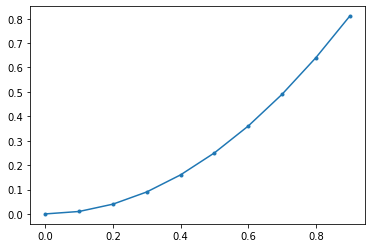

In [9]:
ax0 = plt.subplot()
ax0.plot(x, x**2, '.-')

In [10]:
type(ax0)

matplotlib.axes._subplots.AxesSubplot

Notice that `ax1` is an `AxesSubplot` type. This object has methods, like `plot`, which allow you to control those axes. Treating axes as separate objects from a figure allows us to have control over subplots.

Text(0.5, 0.5, 'ax2 = subplot(2,1,2)')

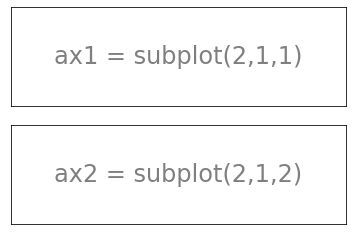

In [11]:
# This cell's code is modified from: https://github.com/rougier/matplotlib-tutorial/blob/master/scripts/subplot-horizontal.py 
# Accessed 10/12/20

# Create subplots
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)

# Style the axes individually
ax1.set_xticks([])
ax1.set_yticks([])
ax1.text(0.5,0.5, 'ax1 = subplot(2,1,1)',ha='center',va='center',size=24,alpha=.5)

ax2.set_xticks([])
ax2.set_yticks([])
ax2.text(0.5,0.5, 'ax2 = subplot(2,1,2)',ha='center',va='center',size=24,alpha=.5)

Or we can use the `plt.subplots(ncols=N, nrows=M)` function to get the figure with NxM subplots.

Text(0.5, 0.5, 'ax[2, 1]')

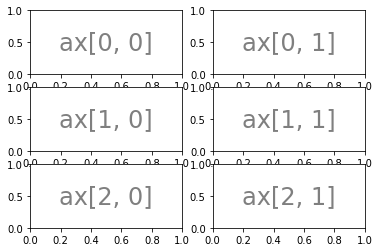

In [22]:
fig, ax = plt.subplots(ncols=2, nrows=3)

# Add text to highlight which plot is which.
ax[0, 0].text(0.5,0.5, 'ax[0, 0]',ha='center',va='center',size=24,alpha=.5)
ax[0, 1].text(0.5,0.5, 'ax[0, 1]',ha='center',va='center',size=24,alpha=.5)
ax[1, 0].text(0.5,0.5, 'ax[1, 0]',ha='center',va='center',size=24,alpha=.5)
ax[1, 1].text(0.5,0.5, 'ax[1, 1]',ha='center',va='center',size=24,alpha=.5)
ax[2, 0].text(0.5,0.5, 'ax[2, 0]',ha='center',va='center',size=24,alpha=.5)
ax[2, 1].text(0.5,0.5, 'ax[2, 1]',ha='center',va='center',size=24,alpha=.5)

In [17]:
print("Shape of object 'ax': ")
print(ax.shape)
print("Data type of the entry with indices [0, 0]: ")
print(type(ax[0,0]))

Shape of object 'ax': 
(3, 2)
Data type of the entry with indices [0, 0]: 
<class 'matplotlib.axes._subplots.AxesSubplot'>


<div class="alert alert-block alert-info">
    <b>Exercise 1</b> <p>Try it out: Make a plot using matplotlib subplot objects! Need some ideas?</p>
    <ol>
        <li> Plot $y$ vs $sin(x)$ in subplot 1 and $y$ vs $cos(x)$ in subplot 2.
        <li> Refactor the code for one of your previous visualization(s) to use subplot or axes objects. How were you able to improve the visualization?
    </ol>
</div>

1. Start with this code or choose your own example.

In [23]:
x = np.arange(0, 2*np.pi, .1)

# your code here!

2. Start with this code or choose your own example

In [24]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-10-22/horror_movies.csv")
df['year_released'] = pd.to_datetime(df['release_date']).map(lambda d: d.year)
df['has_witches'] = df['plot'].str.contains('witch')

Text(0, 0.5, 'Number of movies')

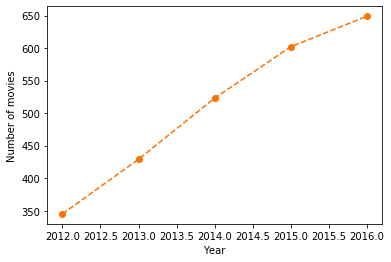

In [25]:
# Refactor this code...
years = np.arange(df['year_released'].min(), df['year_released'].max())
total_count = [df[df['year_released']==y].shape[0] for y in years]
plt.plot(years, total_count, 'o--', c='xkcd:orange', label="total")
plt.xlabel("Year")
plt.ylabel("Number of movies")

## Getting & Setting axes properties

You may be asking, why do I need to use `set_xlabel`, `set_xticks`, etc. instead of just `ticks` or `xlabel`? This allows us to use the concept of a "getter" and a "setter": the `get_xticks` function will get the values of ticks for you, while the `set_xticks` will set them.

In [26]:
ax0.get_xticks()

array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

The `subplot` function always creates equally-sized subplots on a grid. What if we want different-sized subplots, for example to create insets on our plot? For this, we use the `axes` functions to get a generic axes objects. Use a list or tuple of numbers, `[left position, bottom position, width, height]`, with units in percentages of the figure.

In [27]:
help(ax0.set_xticklabels)


Help on method set_xticklabels in module matplotlib.axes._base:

set_xticklabels(labels, fontdict=None, minor=False, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Set the x-tick labels with list of string labels.
    
    Parameters
    ----------
    labels : List[str]
        List of string labels.
    
    fontdict : dict, optional
        A dictionary controlling the appearance of the ticklabels.
        The default `fontdict` is::
    
           {'fontsize': rcParams['axes.titlesize'],
            'fontweight': rcParams['axes.titleweight'],
            'verticalalignment': 'baseline',
            'horizontalalignment': loc}
    
    minor : bool, optional
        Whether to set the minor ticklabels rather than the major ones.
    
    Returns
    -------
    A list of `~.text.Text` instances.
    
    Other Parameters
    -----------------
    **kwargs : `~.text.Text` properties.



Text(0, 0.5, '$x^2$')

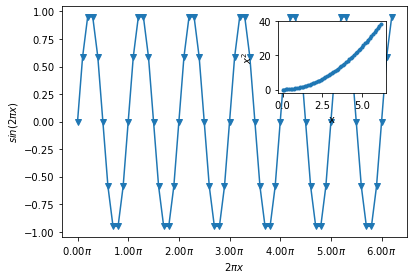

In [28]:
ax3 = plt.axes([0.1,0.1,.8,.8])
ax4 = plt.axes([0.6,0.6,.25,.25])

ax3.plot(x, np.sin(2*np.pi*x), 'v-')
ax3.set_xlabel("$2\pi x$")
ax3.set_ylabel("$sin(2\pi x)$")

tick_positions = ax3.get_xticks()
tick_labels = ["${:.2f}\pi$".format(t) for t in tick_positions]
ax3.set_xticklabels(tick_labels)

ax4.plot(x, x**2, '.-')
ax4.set_xlabel("x")
ax4.set_ylabel("$x^2$")

<div class="alert alert-block alert-info">
    <b>Exercise 2</b>
    <p>Try it out: Use tick formatting on one of your visualizations. Need some ideas?</p>
    <ol>
        <li> Improve one of your visualizations, for example, so that the year displays as 2016 instead of 2016.0
        <li> Make a visualization that shows what time of year is most popular for horror movie releases.
    </ol>
</div>

1. Improve this code or choose your own example.

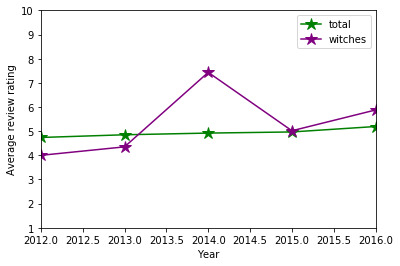

In [29]:
# Edit this code...

years = np.arange(df['year_released'].min(), df['year_released'].max())
avg_rating = [df[df['year_released']==y]['review_rating'].mean() for y in years]
avg_rating_witches = [df[(df['year_released']==y) & (df['has_witches'])]['review_rating'].mean() for y in years]

ax = plt.subplot()
ax.plot(years, avg_rating, '*-', c='green', label="total", ms='12')
ax.plot(years, avg_rating_witches, '*-', c='purple', label='witches', ms='12')
ax.set_xlabel("Year")
ax.set_ylabel("Average review rating")
ax.set_xlim(years[0], years[-1])
ax.set_ylim(1, 10)
ax.legend()

2. Here's some code to get you started.

In [30]:
df['month_released'] = pd.to_datetime(df['release_date']).map(lambda d: d.month)

# Your code here...

### Example Solutions

Example solutions are below the comic!

![PhD Comics](http://phdcomics.com/comics/archive/phd080715s.gif)

**Exercise 2.1** Example solution

[Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016')]

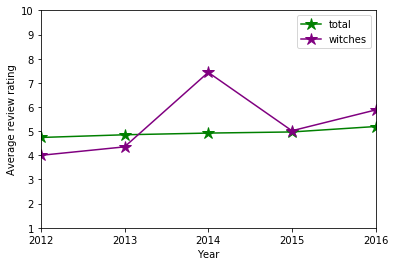

In [31]:
years = np.arange(df['year_released'].min(), df['year_released'].max())
avg_rating = [df[df['year_released']==y]['review_rating'].mean() for y in years]
avg_rating_witches = [df[(df['year_released']==y) & (df['has_witches'])]['review_rating'].mean() for y in years]

ax = plt.subplot()
ax.plot(years, avg_rating, '*-', c='green', label="total", ms='12')
ax.plot(years, avg_rating_witches, '*-', c='purple', label='witches', ms='12')
ax.set_xlabel("Year")
ax.set_ylabel("Average review rating")
ax.set_xlim(years[0], years[-1])
ax.set_ylim(1, 10)
ax.legend()

years = [int(y) for y in years]
ax.set_xticks(years)
ax.set_xticklabels(years)

**Exercise 2.2** Example solution

In [32]:
df['month_released'] = pd.to_datetime(df['release_date']).map(lambda d: d.month)
df['month_released'].unique()

array([10,  1,  4,  6,  5,  7,  3,  9,  2,  8, 11, 12], dtype=int64)

Text(0.5, 1.0, 'Number of movies released per month')

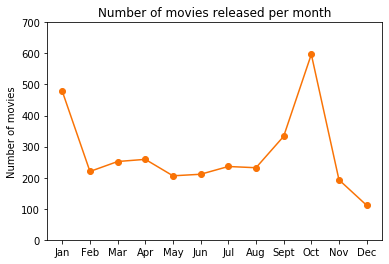

In [33]:
month = np.arange(1, 13, 1)  # Remember: 13 is not included in the arange!
count_per_month = [df[df['month_released'] == m].shape[0] for m in month]

ax = plt.subplot()
ax.plot(month, count_per_month, 'o-', c='xkcd:orange')
ax.set_xticks(month)
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"])
ax.set_ylabel("Number of movies")
ax.set_ylim(0,700)
ax.set_title("Number of movies released per month")